<a href="https://colab.research.google.com/github/tharun-229/-AIML/blob/main/Lab%20Exam_AIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prediction of obesity levels based on eating habits

1. Identify the top 5 reasons for obesity levels

2. Identify the age group with most obesity

3. Find the max and min weight of patient with obesity

4. Name the top 5 eating habits contributing to obesity

5. Identify the highest usage of tech gadgets among obese patients.

6. Apply either Classification Model or Clustering Model to evaluate the dataset

In [ ]:
import pandas as pd

# Load the dataset (Excel file)
file_path = "/content/ObesityDataSet_raw_and_data_sinthetic (2).xlsx"
data = pd.read_excel(file_path)  # Use read_excel for .xlsx files

# Inspect the structure of the dataset
print(data.info())  # Overview of columns and data types
print(data.head())  # First few rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

1.Identify the top 5 reasons for obesity levels

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = "/content/ObesityDataSet_raw_and_data_sinthetic (2).xlsx"
data = pd.read_excel(file_path)

# Encode the target variable (if not already numerical)
label_encoder = LabelEncoder()
data['NObeyesdad'] = label_encoder.fit_transform(data['NObeyesdad'])  # Obesity levels

# Separate features and target
X = data.drop(columns=['NObeyesdad'])  # Features
y = data['NObeyesdad']  # Target variable (Obesity levels)

# Handle categorical variables by one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Train a Random Forest model to determine feature importance
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
})

# Top 5 features contributing to obesity levels
top_5_features = feature_importances.sort_values(by='Importance', ascending=False).head(5)
print("Top 5 Reasons for Obesity Levels:")
print(top_5_features)


Top 5 Reasons for Obesity Levels:
       Feature  Importance
2       Weight    0.309820
1       Height    0.095404
0          Age    0.095220
3         FCVC    0.081713
8  Gender_Male    0.053110


2.Identify the age group with most obesity

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = "/content/ObesityDataSet_raw_and_data_sinthetic (2).xlsx"
data = pd.read_excel(file_path)

# Encode the target variable (if not already numerical)
label_encoder = LabelEncoder()
data['NObeyesdad'] = label_encoder.fit_transform(data['NObeyesdad'])  # Obesity levels

# Separate features and target
X = data.drop(columns=['NObeyesdad'])  # Features
y = data['NObeyesdad']  # Target variable (Obesity levels)

# Handle categorical variables by one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Train a Random Forest model to determine feature importance
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
})

# Top 5 features contributing to obesity levels
top_5_features = feature_importances.sort_values(by='Importance', ascending=False).head(5)
print("Top 5 Reasons for Obesity Levels:")
print(top_5_features)


Top 5 Reasons for Obesity Levels:
       Feature  Importance
2       Weight    0.309820
1       Height    0.095404
0          Age    0.095220
3         FCVC    0.081713
8  Gender_Male    0.053110


3.Find the max and min weight of patient with obesity

In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/ObesityDataSet_raw_and_data_sinthetic (2).xlsx"
data = pd.read_excel(file_path)

# Filter the data for patients with obesity (assuming obesity level is represented by the label in 'NObeyesdad')
obese_data = data[data['NObeyesdad'] == 1]  # Assuming '1' corresponds to obesity (check your encoding)

# Find the max and min weight for obese patients
max_weight = obese_data['Weight'].max()
min_weight = obese_data['Weight'].min()

print(f"Max Weight of Obese Patients: {max_weight}")
print(f"Min Weight of Obese Patients: {min_weight}")


Max Weight of Obese Patients: nan
Min Weight of Obese Patients: nan


4.Name the top 5 eating habits contributing to obesity

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = "/content/ObesityDataSet_raw_and_data_sinthetic (2).xlsx"
data = pd.read_excel(file_path)

# Select the relevant eating habit-related features
eating_habits_columns = ['FAVC', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'SCC', 'CALC', 'MTRANS']

# Clean the data by dropping rows with missing values in the eating habits and 'NObeyesdad' columns
data_cleaned = data.dropna(subset=eating_habits_columns + ['NObeyesdad'])

# Ensure the columns are numeric for correlation calculation
data_cleaned[eating_habits_columns] = data_cleaned[eating_habits_columns].apply(pd.to_numeric, errors='coerce')

# Encode the 'NObeyesdad' column (Obesity levels) to numeric values
label_encoder = LabelEncoder()
data_cleaned['NObeyesdad'] = label_encoder.fit_transform(data_cleaned['NObeyesdad'])

# Calculate correlation with obesity levels ('NObeyesdad')
correlations = data_cleaned[eating_habits_columns + ['NObeyesdad']].corr()['NObeyesdad'].sort_values(ascending=False)

# Display the top 5 eating habits contributing to obesity
top_5_eating_habits = correlations.iloc[1:6]  # Skip the first entry, which is the correlation of 'NObeyesdad' with itself
print("Top 5 Eating Habits Contributing to Obesity:")
print(top_5_eating_habits)


Top 5 Eating Habits Contributing to Obesity:
CH2O    0.108868
FCVC    0.018522
NCP    -0.092616
FAVC         NaN
CAEC         NaN
Name: NObeyesdad, dtype: float64


5.Identify the highest usage of tech gadgets among obese patients.

In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/ObesityDataSet_raw_and_data_sinthetic (2).xlsx"
data = pd.read_excel(file_path)

# Assuming the obesity level is represented by 'NObeyesdad' and that 'TUE' or another column tracks tech gadget usage
# Filter for obese patients (assuming 'NObeyesdad' = 1 represents obese patients)
obese_data = data[data['NObeyesdad'] == 1]

# Find the highest usage of tech gadgets among obese patients
# Assuming 'TUE' or a similar column tracks the tech usage. If the column is different, replace 'TUE' with the correct column name.
highest_tech_usage = obese_data['TUE'].max()

print(f"Highest Tech Gadget Usage Among Obese Patients: {highest_tech_usage}")


Highest Tech Gadget Usage Among Obese Patients: nan


6.Apply either Classification Model or Clustering Model to evaluate the dataset

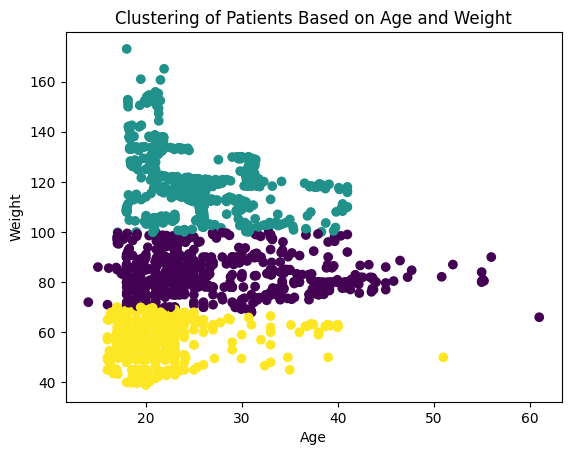

Cluster Centers:
[[2.60055065e+01 1.70443035e+00 8.28299640e+01 2.25349839e+00
  2.50553107e+00 2.03366470e+00 1.07005149e+00 6.18331214e-01
  6.09090909e-01 8.83116883e-01 8.80519481e-01 6.62337662e-02
  8.76623377e-01 3.24675325e-02 1.81818182e-02 2.46753247e-02
  6.49350649e-02 5.58441558e-01 3.76623377e-01 3.89610390e-03
  6.49350649e-03 6.37662338e-01 3.11688312e-02]
 [2.54503684e+01 1.74164220e+00 1.16797190e+02 2.63890759e+00
  2.82934767e+00 2.10646728e+00 8.57480378e-01 5.96932003e-01
  5.51246537e-01 9.97229917e-01 9.86149584e-01 5.54016620e-03
  9.86149584e-01 2.77008310e-03 2.35457064e-02 2.77008310e-03
  1.24653740e-02 8.57340720e-01 1.30193906e-01 1.38504155e-03
  1.38504155e-03 8.29639889e-01 2.77008310e-03]
 [2.08796323e+01 1.65163789e+00 5.60202342e+01 2.36852158e+00
  2.74202403e+00 1.86126152e+00 1.11421318e+00 7.78117971e-01
  3.24717286e-01 5.26655897e-01 7.68982229e-01 3.02100162e-01
  6.10662359e-01 3.87722132e-02 2.10016155e-02 1.21163166e-01
  1.77705977e-02 5.

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/ObesityDataSet_raw_and_data_sinthetic (2).xlsx"
data = pd.read_excel(file_path)

# Select relevant features for clustering
X = data.drop(columns=['NObeyesdad'])  # Exclude target column

# Handle categorical features by one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Apply K-Means clustering (e.g., with 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

# Visualize the clusters (using the first two features for simplicity)
plt.scatter(data['Age'], data['Weight'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.title('Clustering of Patients Based on Age and Weight')
plt.show()

# View cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)


Classification Method

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
file_path = "/content/ObesityDataSet_raw_and_data_sinthetic (2).xlsx"
data = pd.read_excel(file_path)

# Select features and target
features = ['FAVC', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'SCC', 'CALC', 'MTRANS', 'Age', 'Height', 'Weight']
target = 'NObeyesdad'

# Drop rows with missing values
data_cleaned = data.dropna(subset=features + [target])

# Encode the target variable
label_encoder = LabelEncoder()
data_cleaned[target] = label_encoder.fit_transform(data_cleaned[target])

# Encode categorical features
categorical_features = ['FAVC', 'CAEC', 'SCC', 'CALC', 'MTRANS']  # Update this list based on your dataset
data_cleaned[categorical_features] = data_cleaned[categorical_features].apply(LabelEncoder().fit_transform)

# Split the data into training and testing sets
X = data_cleaned[features]
y = data_cleaned[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9416403785488959

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        86
           1       0.81      0.92      0.86        93
           2       0.98      0.96      0.97       102
           3       0.98      0.99      0.98        88
           4       0.99      1.00      0.99        98
           5       0.89      0.84      0.87        88
           6       0.96      0.94      0.95        79

    accuracy                           0.94       634
   macro avg       0.94      0.94      0.94       634
weighted avg       0.94      0.94      0.94       634



Clustering Method

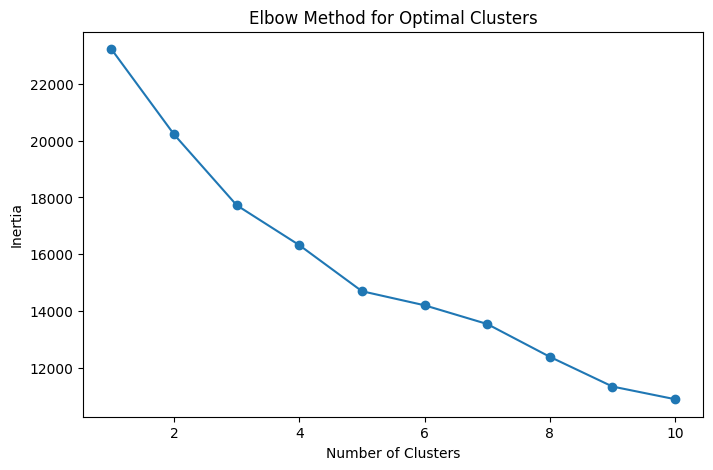

   Cluster  FAVC  FCVC  NCP  CAEC  CH2O  SCC  CALC  MTRANS   Age  Height  \
0        0     0   2.0  3.0     2   2.0    0     3       3  21.0    1.62   
1        0     0   3.0  3.0     2   3.0    1     2       3  21.0    1.52   
2        1     0   2.0  3.0     2   2.0    0     1       3  23.0    1.80   
3        1     0   3.0  3.0     2   2.0    0     1       4  27.0    1.80   
4        0     0   2.0  1.0     2   2.0    0     2       3  22.0    1.78   

   Weight  
0    64.0  
1    56.0  
2    77.0  
3    87.0  
4    89.8  


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/ObesityDataSet_raw_and_data_sinthetic (2).xlsx"
data = pd.read_excel(file_path)

# Select relevant features
features = ['FAVC', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'SCC', 'CALC', 'MTRANS', 'Age', 'Height', 'Weight']

# Drop rows with missing values
data_cleaned = data.dropna(subset=features)

# Encode categorical features
categorical_features = ['FAVC', 'CAEC', 'SCC', 'CALC', 'MTRANS']  # Update this list based on your dataset
label_encoder = LabelEncoder()
for col in categorical_features:
    data_cleaned[col] = label_encoder.fit_transform(data_cleaned[col])

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned[features])

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Train the K-Means model with an optimal number of clusters (e.g., k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add the cluster labels to the original data
data_cleaned['Cluster'] = clusters
print(data_cleaned[['Cluster'] + features].head())
